<a href="https://colab.research.google.com/github/Yoojinchon/Data-Driven-Sleep-Health-Insights-for-Healthcare-and-Tech-Companies/blob/main/Data_Driven_Sleep_Health_Insights_for_Healthcare_and_Tech_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

#**Data-Driven Sleep Health: Insights for Healthcare and Tech Companies**

---


>  **Yoojin Chon**


#1. Objective of the Proposed Research

The purpose of this study is to use data sets to help two key stakeholders. This data set contains various variables related to sleep and daily habits. The first stakeholder is the healthcare provider. It can improve diagnostic and treatment approaches for sleep disorders. The second stakeholder is a health technology company. It aims to support the development of new medical apps and devices.

For healthcare providers, the study can lead to early detection of sleep disorders. By analyzing the data, you can detect sleep-related patterns and identify anomalies. Early detection prevents the progression of sleep disorders.

Health technology companies can develop products and services based on datasets. Data can be used to develop health monitoring applications. In addition, the development of continuous monitoring services can detect pre-signs of sleep disorders.

>  Data handling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored

from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



In [ ]:
#read the csv file
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# 2. Data Exploration
definition of features from website(https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset):
Dataset Columns:

1. Person ID: An identifier for each individual.

2. Gender: The gender of the person (Male/Female).

3. Age: The age of the person in years.

4. Occupation: The occupation or profession of the person.

5. Sleep Duration (hours): The number of hours the person sleeps per day.

6. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

8. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

9. BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.

12. Daily Steps: The number of steps the person takes per day.

13. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [ ]:
shape = df.shape
print('The dimention is :',shape)

The dimention is : (374, 13)


In [ ]:
#get the columns names of the dataset
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Quickly understand the data type and information.
#There are 5 columns are string and the rest are numeric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
#Quickly understand data distribution
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#3. Data cleaning

Since we got a pretty cleaned dataset, I will remove useless columns in the data.

In [ ]:
#Missing value analysis, there is no missing value in this dataset.
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
#There are no duplicated rows either.
df.duplicated().sum()

0

In [ ]:
#Person ID is useless for this research, because it is only the numbering of the survey that's meaningless.
df = df.drop('Person ID', axis=1)
df.shape

(374, 12)

# 4. Adaptation

In [ ]:
# column addition 1
# connection with Daily steps and Heart Rate
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

df['Steps_to_Heart_Rate_Ratio'] = df['Daily Steps'] / df['Heart Rate']

print(df[['Daily Steps', 'Heart Rate', 'Steps_to_Heart_Rate_Ratio']])

     Daily Steps  Heart Rate  Steps_to_Heart_Rate_Ratio
0           4200          77                  54.545455
1          10000          75                 133.333333
2          10000          75                 133.333333
3           3000          85                  35.294118
4           3000          85                  35.294118
..           ...         ...                        ...
369         7000          68                 102.941176
370         7000          68                 102.941176
371         7000          68                 102.941176
372         7000          68                 102.941176
373         7000          68                 102.941176

[374 rows x 3 columns]


In [ ]:
# column addition 2
# connection with Sleep Duration and Physical Activity Level
df['Sleep_Activity_Relation'] = df['Sleep Duration'] * df['Physical Activity Level']
print(df[['Sleep_Activity_Relation', 'Sleep Duration', 'Physical Activity Level']])

     Sleep_Activity_Relation  Sleep Duration  Physical Activity Level
0                      256.2             6.1                       42
1                      372.0             6.2                       60
2                      372.0             6.2                       60
3                      177.0             5.9                       30
4                      177.0             5.9                       30
..                       ...             ...                      ...
369                    607.5             8.1                       75
370                    600.0             8.0                       75
371                    607.5             8.1                       75
372                    607.5             8.1                       75
373                    607.5             8.1                       75

[374 rows x 3 columns]


In [ ]:
df['Scaled_Quality_of_Sleep'] = df['Quality of Sleep']/10
df['Scaled_Stress_Level'] = df['Stress Level']/10

In [ ]:
df['Effective_Sleep_Duration'] = df['Sleep Duration'] * df['Scaled_Quality_of_Sleep']

In [ ]:
df_none = df[df["Sleep Disorder"] == "None"]
df[df['Sleep Disorder']=="None"].describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,219.0,146.972603,100.646895,1.000000,65.500000,128.000000,207.500000,360.000000
Age,219.0,39.036530,7.827764,27.000000,32.000000,38.000000,43.000000,59.000000
Sleep Duration,219.0,7.358447,0.732320,6.000000,7.100000,7.400000,7.800000,8.500000
Quality of Sleep,219.0,7.625571,0.975142,6.000000,7.000000,8.000000,8.000000,9.000000
Physical Activity Level,219.0,57.949772,20.929814,30.000000,30.000000,60.000000,75.000000,90.000000
Stress Level,219.0,5.114155,1.591471,3.000000,4.000000,5.000000,6.000000,8.000000
Heart Rate,219.0,69.018265,2.657797,65.000000,68.000000,70.000000,70.000000,77.000000
Daily Steps,219.0,6852.968037,1393.473600,4200.000000,5000.000000,7000.000000,8000.000000,10000.000000
Steps_to_Heart_Rate_Ratio,219.0,99.274900,19.639532,54.545455,76.923077,102.941176,114.285714,153.846154
Sleep_Activity_Relation,219.0,430.379909,169.930389,180.000000,255.000000,432.000000,577.500000,738.000000


In [ ]:
df_apnea = df[df["Sleep Disorder"] == "Sleep Apnea"]
df[df['Sleep Disorder']=="Sleep Apnea"].describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,78.0,272.884615,103.707378,4.000000,270.250000,292.500000,352.750000,374.000000
Age,78.0,49.705128,8.990773,28.000000,49.000000,50.000000,57.750000,59.000000
Sleep Duration,78.0,7.032051,0.974812,5.800000,6.100000,6.800000,8.100000,8.200000
Quality of Sleep,78.0,7.205128,1.646397,4.000000,6.000000,6.000000,9.000000,9.000000
Physical Activity Level,78.0,74.794872,17.926516,30.000000,75.000000,75.000000,90.000000,90.000000
Stress Level,78.0,5.666667,2.333643,3.000000,3.000000,7.000000,8.000000,8.000000
Heart Rate,78.0,73.089744,5.117289,68.000000,68.000000,75.000000,75.000000,86.000000
Daily Steps,78.0,7619.230769,2168.191400,3000.000000,7000.000000,7000.000000,10000.000000,10000.000000
Steps_to_Heart_Rate_Ratio,78.0,105.050289,29.479636,35.294118,102.941176,102.941176,133.333333,133.333333
Sleep_Activity_Relation,78.0,525.214103,131.202525,177.000000,540.000000,549.000000,607.500000,702.000000


In [ ]:
df_insomnia = df[df["Sleep Disorder"] == "Insomnia"]
df[df['Sleep Disorder']=="Insomnia"].describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,77.0,216.272727,65.982581,6.000000,195.000000,231.000000,252.000000,316.000000
Age,77.0,43.519481,4.808464,28.000000,43.000000,44.000000,45.000000,53.000000
Sleep Duration,77.0,6.589610,0.387157,5.900000,6.400000,6.500000,6.600000,8.300000
Quality of Sleep,77.0,6.532468,0.804337,4.000000,6.000000,7.000000,7.000000,9.000000
Physical Activity Level,77.0,46.818182,11.751514,30.000000,45.000000,45.000000,45.000000,90.000000
Stress Level,77.0,5.870130,1.463150,3.000000,4.000000,7.000000,7.000000,8.000000
Heart Rate,77.0,70.467532,4.948643,65.000000,65.000000,72.000000,72.000000,85.000000
Daily Steps,77.0,5901.298701,1000.328039,3000.000000,6000.000000,6000.000000,6000.000000,10000.000000
Steps_to_Heart_Rate_Ratio,77.0,84.563002,16.341843,35.294118,83.333333,83.333333,92.307692,133.333333
Sleep_Activity_Relation,77.0,310.727273,95.397698,177.000000,283.500000,292.500000,297.000000,702.000000


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,364,365,366,367,368,369,370,371,372,373
Person ID,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
Age,27,28,28,28,28,28,29,29,29,29,...,59,59,59,59,59,59,59,59,59,59
Occupation,Software Engineer,Doctor,Doctor,Sales Representative,Sales Representative,Software Engineer,Teacher,Doctor,Doctor,Doctor,...,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse
Sleep Duration,6.1,6.2,6.2,5.9,5.9,5.9,6.3,7.8,7.8,7.8,...,8.0,8.0,8.1,8.0,8.1,8.1,8.0,8.1,8.1,8.1
Quality of Sleep,6,6,6,4,4,4,6,7,7,7,...,9,9,9,9,9,9,9,9,9,9
Physical Activity Level,42,60,60,30,30,30,40,75,75,75,...,75,75,75,75,75,75,75,75,75,75
Stress Level,6,8,8,8,8,8,7,6,6,6,...,3,3,3,3,3,3,3,3,3,3
BMI Category,Overweight,Normal,Normal,Obese,Obese,Obese,Obese,Normal,Normal,Normal,...,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight
Blood Pressure,126/83,125/80,125/80,140/90,140/90,140/90,140/90,120/80,120/80,120/80,...,140/95,140/95,140/95,140/95,140/95,140/95,140/95,140/95,140/95,140/95


#5. Visualization

In [ ]:
corr = df.corr()

<ipython-input-53-45893e33df67>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



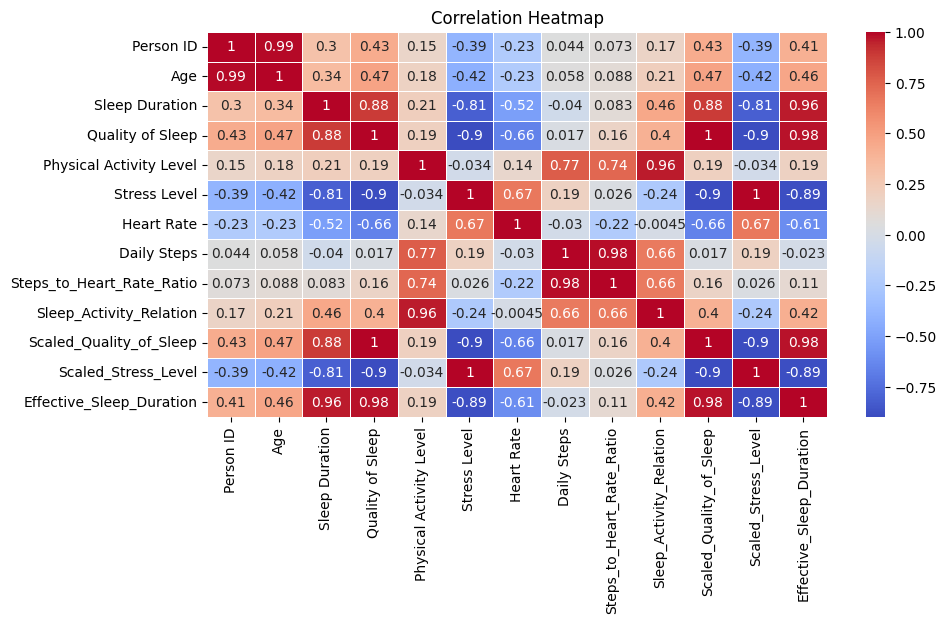

In [ ]:
# The correlation of the data
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Count the number of each categorization
SD_count = df['Sleep Disorder'].value_counts()
SD_count

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [ ]:
#the number of people who are 'None','Sleep Apnea' or 'Insomnia' in Sleep Disorder.
#Most people are None of sleep disorder in this data, and the rest are half sleep Apnea, half Insomnia.
Fig_SD_count = px.histogram(df, x = 'Sleep Disorder',
             color='Sleep Disorder',
             color_discrete_sequence=['yellow','blue','green'],
             text_auto=True,
             )
Fig_SD_count.update_layout(
    autosize=False,
    width=600,
    height=400,
    title="Sleep Disorder Distribution"
)
Fig_SD_count.show()

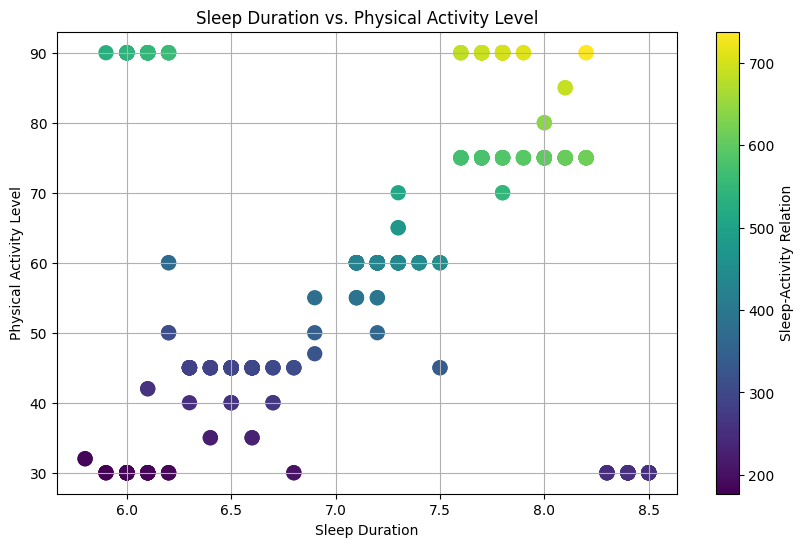

In [ ]:
# scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sleep Duration'], df['Physical Activity Level'], c=df['Sleep_Activity_Relation'], cmap='viridis', s=100)
plt.colorbar(label='Sleep-Activity Relation')
plt.title('Sleep Duration vs. Physical Activity Level')
plt.xlabel('Sleep Duration')
plt.ylabel('Physical Activity Level')
plt.grid(True)
plt.show()

In [ ]:
df_male = df[df["Gender"]=="Male"]
df_female = df[df["Gender"]=="Female"]
print("Male\n",df_male["Sleep Duration"].mean(),"\n")
print("Female\n",df_female["Sleep Duration"].mean())
print("Male\n",df_male["Effective_Sleep_Duration"].mean(),"\n")
print("Female\n",df_female["Effective_Sleep_Duration"].mean())

Male
 7.036507936507937 

Female
 7.22972972972973
Male
 4.959206349206348 

Female
 5.647081081081081


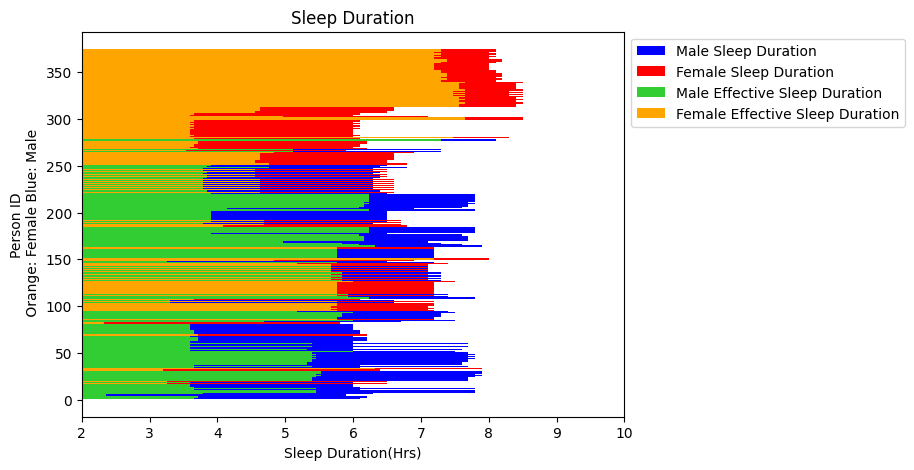

In [ ]:
#Sleep duration of female and male
plt.figure(figsize=(7,5))
plt.barh(df_male["Person ID"], df_male["Sleep Duration"], height = 1, color = "blue", label = "Male Sleep Duration")
plt.barh(df_female["Person ID"], df_female["Sleep Duration"], height = 1, color = "red", label = "Female Sleep Duration")

plt.barh(df_male["Person ID"], df_male["Effective_Sleep_Duration"], height = 1, color = "limegreen", label = "Male Effective Sleep Duration")
plt.barh(df_female["Person ID"], df_female["Effective_Sleep_Duration"], height = 1, color = "orange", label = "Female Effective Sleep Duration")

plt.xlabel("Sleep Duration(Hrs)")
plt.ylabel("Person ID\n Orange: Female Blue: Male")
plt.title("Sleep Duration")
plt.xlim(2,10)
plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.show()

#6. Step-by-step hierarchical clustering:

In [ ]:
SlqStr = df[["Scaled_Quality_of_Sleep", "Scaled_Stress_Level"]]

In [ ]:
elbow = []
for n in range(2, 11):
  aggltve = AgglomerativeClustering(n_clusters = n)
  labels = aggltve.fit_predict(SlqStr)
  elbow.append(silhouette_score(SlqStr, labels))

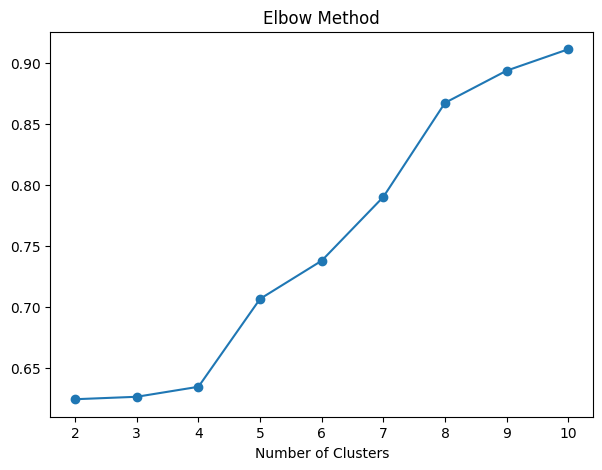

10


,0,1,2,3,4,5,6,7,8,9,...,364,365,366,367,368,369,370,371,372,373
Person ID,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
Age,27,28,28,28,28,28,29,29,29,29,...,59,59,59,59,59,59,59,59,59,59
Occupation,Software Engineer,Doctor,Doctor,Sales Representative,Sales Representative,Software Engineer,Teacher,Doctor,Doctor,Doctor,...,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse,Nurse
Sleep Duration,6.1,6.2,6.2,5.9,5.9,5.9,6.3,7.8,7.8,7.8,...,8.0,8.0,8.1,8.0,8.1,8.1,8.0,8.1,8.1,8.1
Quality of Sleep,6,6,6,4,4,4,6,7,7,7,...,9,9,9,9,9,9,9,9,9,9
Physical Activity Level,42,60,60,30,30,30,40,75,75,75,...,75,75,75,75,75,75,75,75,75,75
Stress Level,6,8,8,8,8,8,7,6,6,6,...,3,3,3,3,3,3,3,3,3,3
BMI Category,Overweight,Normal,Normal,Obese,Obese,Obese,Obese,Normal,Normal,Normal,...,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight,Overweight
Blood Pressure,126/83,125/80,125/80,140/90,140/90,140/90,140/90,120/80,120/80,120/80,...,140/95,140/95,140/95,140/95,140/95,140/95,140/95,140/95,140/95,140/95


In [ ]:

plt.figure(figsize=(7,5))
plt.plot(range(2, 11), elbow, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")

plt.show()
optimal_cluster = elbow.index(max(elbow)) + 2
print(optimal_cluster)
aggltve = AgglomerativeClustering(n_clusters = optimal_cluster)
df["hierarchical clustering"] = aggltve.fit_predict(SlqStr)
df.T

#7. Dendrogram:

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Steps_to_Heart_Rate_Ratio',
       'Sleep_Activity_Relation', 'Scaled_Quality_of_Sleep',
       'Scaled_Stress_Level', 'Effective_Sleep_Duration'],
      dtype='object')

In [ ]:

#stressSquality is the distance matrix for sleep duration, sleep quality, and stress level
stressSquality = pd.DataFrame(euclidean_distances(SlqStr))
stressSquality = round(stressSquality,2)
clstrmod = linkage(stressSquality, method = "centroid")


<ipython-input-28-aa282d89c67c>:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



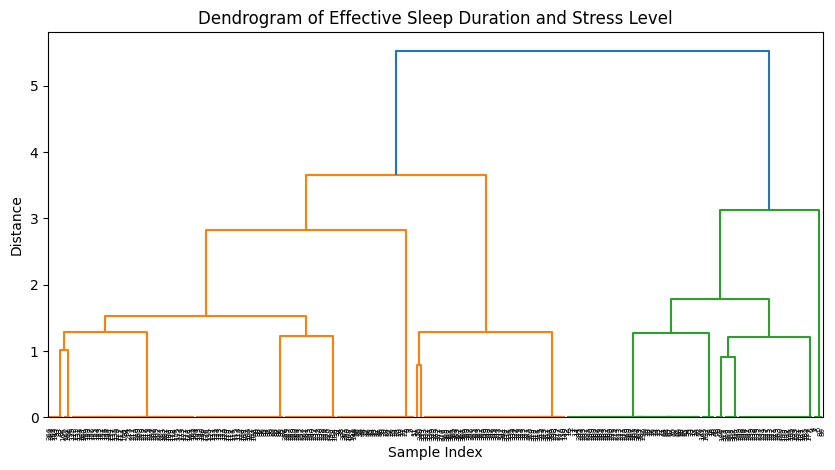

In [ ]:
#Dendrogram between sleep duration, sleep quality, and stress level
plt.figure(figsize=(10, 5))
dendrogram(clstrmod, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Dendrogram of Effective Sleep Duration and Stress Level")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

#8. K-Means step by step

In [ ]:
#For K-Means usage
dfK = np.array(df[["Effective_Sleep_Duration", "Scaled_Stress_Level"]])


In [ ]:
k = 3
np.random.seed(42)
initial_centers = np.random.choice(len(dfK), k, replace=False)
centroids = dfK[initial_centers]

In [ ]:
distances = np.linalg.norm(dfK[:, np.newaxis]- centroids, axis=2)
cluster_assign = np.argmin(distances, axis = 1)
cluster_assign

new_centroids = np.zeros((k, dfK.shape[1]))
for cluster_index in range(k):
  cluster_points = dfK[cluster_assign == cluster_index]
  if len(cluster_points)>0:
    new_centroids[cluster_index] = cluster_points.mean(axis = 0)
centroids = new_centroids

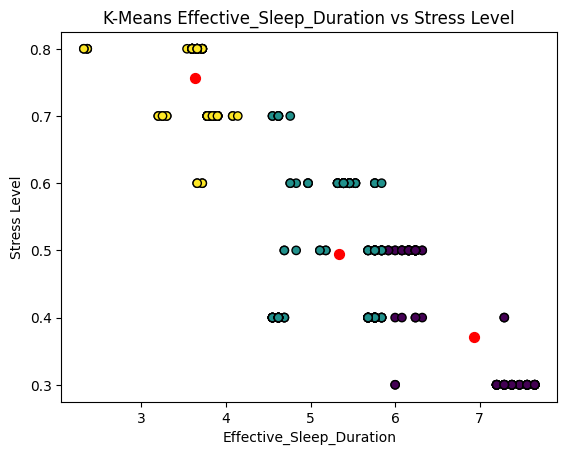

In [ ]:
plt.scatter(dfK[:, 0], dfK[:, 1], c =cluster_assign, cmap="viridis", edgecolors = "k")
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker = "o", s=50, label ="Cluster Centers")
plt.xlabel("Effective_Sleep_Duration")
plt.ylabel("Stress Level")
plt.title("K-Means Effective_Sleep_Duration vs Stress Level")

plt.show()

#9. K-Means with sklearn.clustering
data here need to be in an array

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Steps_to_Heart_Rate_Ratio',
       'Sleep_Activity_Relation', 'Scaled_Quality_of_Sleep',
       'Scaled_Stress_Level', 'Effective_Sleep_Duration'],
      dtype='object')

In [ ]:
#Amount of Cluster
KMnsNcls = 3
#Create KMeans data and fit in
kmeans = KMeans(n_clusters = KMnsNcls)
kmeans.fit(dfK)
#get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



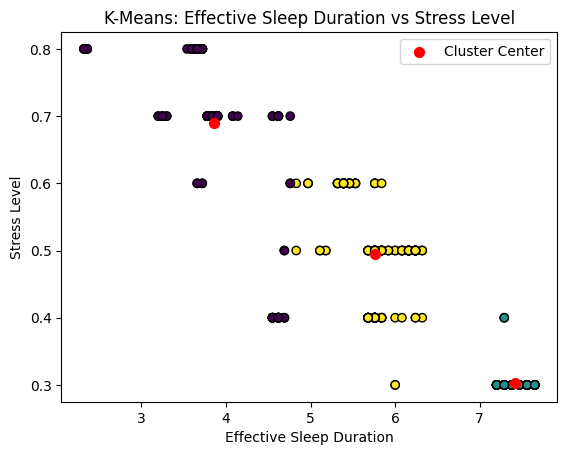

In [ ]:
#plot data points
plt.scatter(dfK[:, 0],dfK[:, 1], c= cluster_labels, edgecolors="k")
plt.scatter(cluster_centers[:,0], cluster_centers[:, 1], s=50, c="red", label="Cluster Center")
plt.legend()
plt.title("K-Means: Effective Sleep Duration vs Stress Level")
plt.xlabel("Effective Sleep Duration")
plt.ylabel("Stress Level")


plt.show()

#10.KNN Function

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Steps_to_Heart_Rate_Ratio',
       'Sleep_Activity_Relation', 'Scaled_Quality_of_Sleep',
       'Scaled_Stress_Level', 'Effective_Sleep_Duration'],
      dtype='object')

In [ ]:
xknnClstr= np.array(df[["Effective_Sleep_Duration", "Stress Level"]])
yknnClstr= np.array(df["Stress Level"])

In [ ]:
def predictKNN(k, dataPoint, dataFrame):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(dataFrame[:, :1], dataFrame[:, 1])
  prediction = knn.predict([dataPoint])
  return prediction[0]

In [ ]:
predictKNN(3, [3.3, 5], xknnClstr)

ValueError: ignored

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xknnClstr, yknnClstr)

In [ ]:

x_min, x_max = xknnClstr[:, 0].min() - 1, xknnClstr[:, 0].max() +1
y_min, y_max = xknnClstr[:, 1].min() - 1, xknnClstr[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [ ]:
z= knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

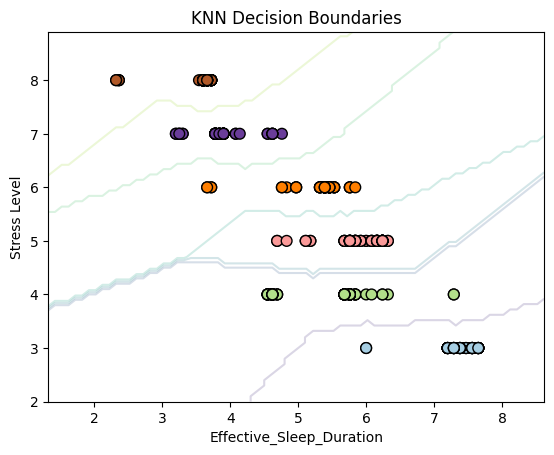

In [ ]:
plt.contour(xx,yy,z,alpha=0.2)
plt.scatter(xknnClstr[:, 0], xknnClstr[:, 1], c=yknnClstr, edgecolors="k", marker="o", s=60, linewidth=1, cmap=plt.cm.Paired)
plt.xlabel("Effective_Sleep_Duration")
plt.ylabel("Stress Level")
plt.title("KNN Decision Boundaries")
plt.show()

# Project Report


# 1. Purpose

We made a report on the correlation between Sleep Health and Lifestyle. The study was conducted for Healthcare providers and the Health technology company. Therefore, we used the data sets required for these two stakeholders. This data set is compiled from body-related data such as Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate (bpm), Daily Steps, and Sleep Disorder to data on activity.


# 2. Methodology

This study was collected by user manual input. Advanced statistical tools such as K-means clustering and machine learning algorithms were used to compare and analyze the data. In addition, we used visual presentations that can help intuitive understanding using heat maps, bar charts, scatter plots, etc.

# 3. discovery

After summarizing the values, we found something surprising. 155 out of 374 participants have sleep discomfort. This is close to 41% of the participants. It can be seen that there is a large proportion of people who are having difficulty sleeping in modern society.

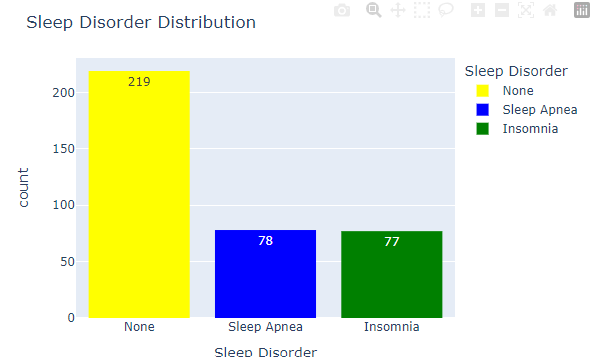

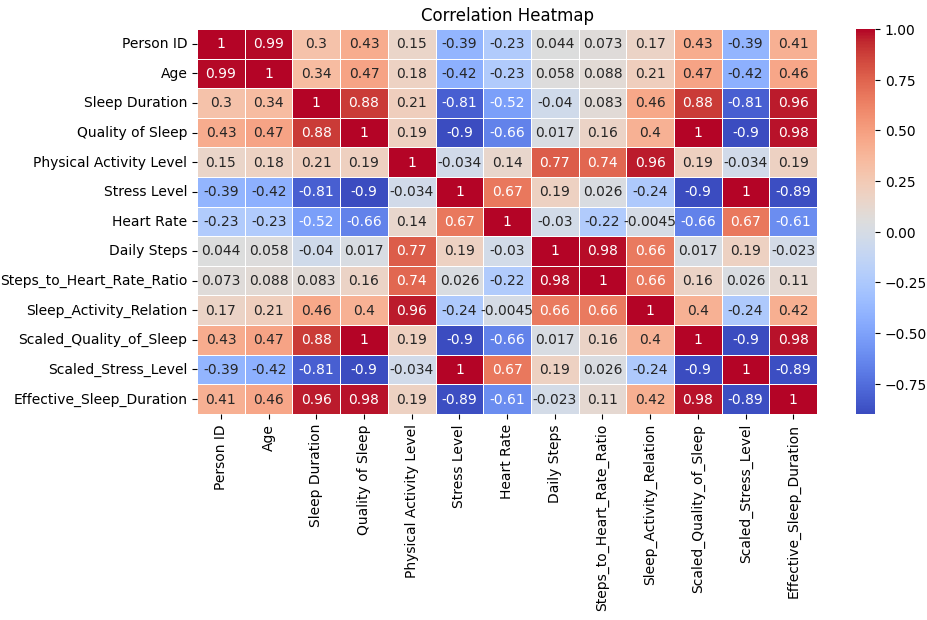

# 4. Findings
The main finding is that the variable most relevant to sleep disorders is Age. Next is Sleep Duration, Quality of Sleep. Also, there is a characteristic that women sleep longer than men. One of the big correlations is Sleep Duration, so we can see that men are more likely to have sleep disorders.

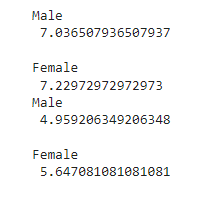

# 5. important Visualizations

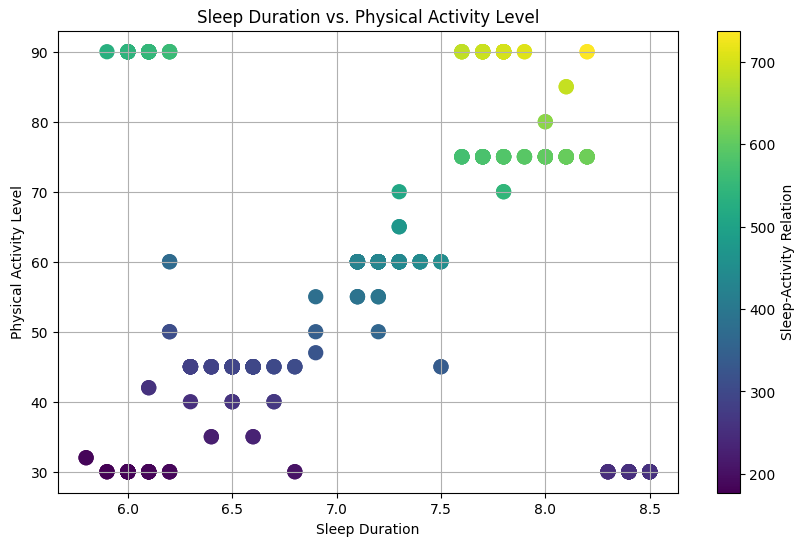

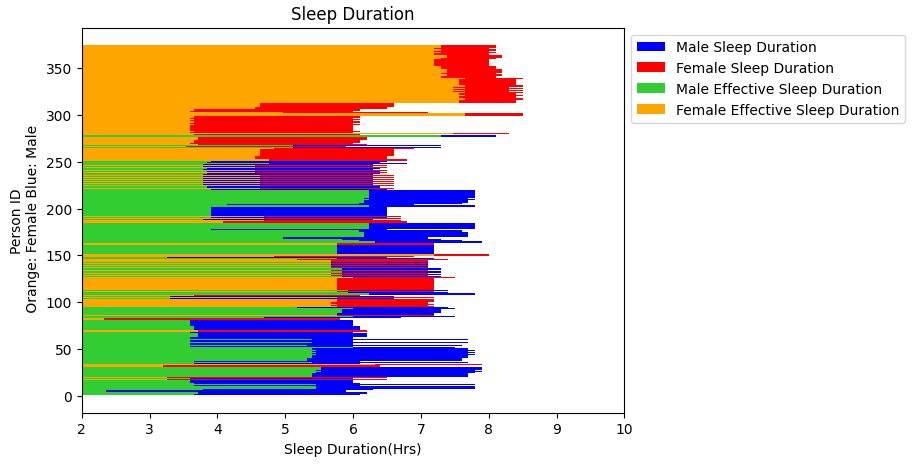

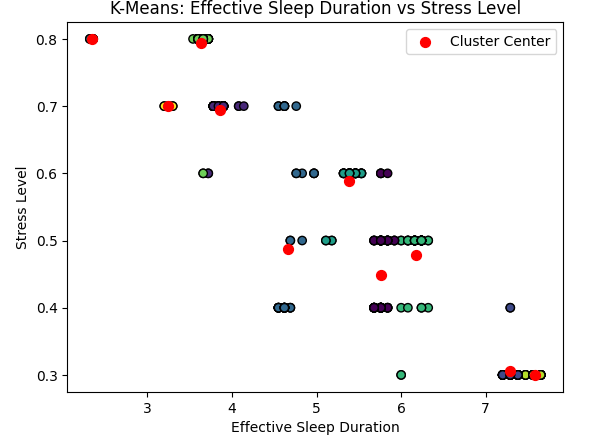

# 6. Suggestions for Healthcare provider


It is recommended to monitor the daily steps, activity, stress levels, etc., including body age, heart rate, which we have measured universally. In addition, taking into account the different sleep patterns observed between men and women, approaching problems based on gender will help detect them early.

#7. Suggestions for Health Technology Companies

Health tech companies aimed at developing sleep monitoring tools are highly recommended to measure your daily activity. Recording your stress index and mood every day is also a good way. Strict standards are needed depending on age. This can be predicted to alert the user of the risk in advance.



#8. precautions

There is something to be careful about when interpreting this. The first is how accurate the wearable device measures. Due to the nature of the wearable device, there is a possibility that the measured value cannot be accurately measured because it must be compact and light in weight. Second, because it is a mark on its own, it is possible that it was checked as you guessed, far from the truth.


# 9. The rason for continuing research

Nevertheless, the reason for continuing research is that 40% of the sample population or some form of sleep disorder. This means that the market for sleep-related services is larger than we previously thought. Investment in R&D can be seen as having sufficient value.


# 10. Conclusion:

Sleep disorder is a common disease, and even if you are healthy now, it may develop anew with age. The future attitude toward sleep disorders should have a preliminary character. Based on this data, preventive measures should be suggested for people who will have sleep disorders in the future.

#Resources

Dataset: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset